# Credit EDA Case Study
## Submitted By: Alex Anthraper & Amit Haldar

## Bckground:


   #### - Cases when company may face the financial loss
    - If the applicant is likely to repay, but not approving the loan
    - If the applicant is not likely to repay, but approving the loan
   #### - Two types of scenarios of the loan applicants
    - The client with payment difficulties: late payment more than X days on at least one of the first  Y instalments of the loan
    - All other cases: All other cases when the payment is paid on time.
   
   #### - When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

    - Approved, Cancelled (by the client due to a higher risk), Refused (rejected by the company), Unused offer (approved but cancelled by the client at the later stage) 
    
## Business Objectives: 

### Analysing the patterns in the consumer and loan application data using EDA for ensuring, whether or not, the applicants are capable of repaying the loans and are not rejected

    - To identify patterns indicating difficulties in paying installments because of:
        - Denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate

    - In other words, the company wants to identify and understand the driving factors (variables) an indicators for possible loan defaults

#### Importing required libraries

In [1]:
#import the warnings.
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns
import rise

In [3]:
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [4]:
curr_app0 = pd.read_csv('data/application_data.csv')
prev_app0 = pd.read_csv('data/previous_application.csv')

### Steps to follow (Note: No need to do the imputation)

##### Shall be applied in application csv file
1. Check with the normal routine (head, shae, info, describe etc.)
2. Finding the % of the null values in all columns
3. Drop the columns more than 50% (>=50%)
4. Identify 5 columns with <=13% missing values and identify the best possible values for imputing (just for reporting)
5. Identify the columns with incorrect datatype (At least 10 columns) - Conversions
   - Categorical data shall be object dtype
   - Continuous data shall be in int/float dtype
   - Negative age or date to positives using absolute values
6. Min 5 columns (numerical) identify the outliers (no treatment for outliers is required)
7. Creating bins from a continuous data (minimum two columns)

8. Whether the data is imbalance, if yes what is the percentage (Target column)
9. Create two dataframes using target column (0, 1). Then do the univariate and bivariate analysis
    - We can take only 20-25 columns for performing univariate and bivariate analysis
    - Univariate: Categorical/Continuous
    - Bivariate: 
        - Categorical - Categorical
        - Categorical - Continuous
        - Continuous - Continuous
    - min 5 plots for each analysis (Total 25 plots)
10. Using these two sub dataframes we need to identify correlations (min 10 variables)

##### Previous application csv file (Target Column is Contract Status)
1. No need to perform any cleaning steps in the previous application data
2. We can either merge it with the application data or we can perform analysis separately
3. We need to directly perform all univariate and bivariate analysis
4. Finally we will have to take out the inferences
5. Prepare the final presentation including the results and inferences and recommendations to the bank

### Q1. Data overview: Normal routine check (head, shape, info, describe etc.)

In [5]:
print(curr_app0.shape)
print(prev_app0.shape)

(307511, 122)
(1670214, 37)


In [6]:
print(curr_app0.info)
print(prev_app0.info)

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [7]:
curr_app0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Q2. Finding the % of the null values in all columns

In [8]:
curr_app0.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

#### Since curr_app0.isnull().sum()/len(curr_app0) = mean
#### Therefore, we can directly use the mean function

In [9]:
# Percentage of null values in each columns - Descending order
curr_app_null = curr_app0.isnull().mean().round(4)*100
curr_app_null.sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [10]:
# Columns with more than 50% null values
curr_app_50nullcols = curr_app_null[curr_app_null > 50]
curr_app_50nullcols = list(curr_app_50nullcols.index)
curr_app_50nullcols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

### Q3. Drop the columns more than 50% (>=50%)
#### Creating new databse by dropping the columns with more than 50% null values

In [11]:
curr_app1 = curr_app0.drop(curr_app_50nullcols, axis=1)
curr_app1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [12]:
curr_app1[curr_app1.AMT_GOODS_PRICE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

### Q4. Identify 5 columns with <=13% missing values and identify the best possible values for imputing (just for reporting)

In [13]:
curr_app_13null = curr_app_null[(curr_app_null <= 13) & (curr_app_null > 0)]
curr_app_13nullcols = list(curr_app_13null.index)
curr_app_13nullcols

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

#### AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given
#### NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan
#### EXT_SOURCE_2 - Normalized score from external data source
#### OBS_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 30 DPD (days past due) default
#### OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default
#### DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD

In [14]:
curr_app1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [15]:
curr_app1.AMT_GOODS_PRICE.isnull().value_counts()

False    307233
True        278
Name: AMT_GOODS_PRICE, dtype: int64

### Imputing criteria for the variable AMT_GOODS_PRICE

In [16]:
curr_app1.groupby('NAME_FAMILY_STATUS')['AMT_GOODS_PRICE'].mean()

NAME_FAMILY_STATUS
Civil marriage          481445.256580
Married                 580014.475645
Separated               492932.941388
Single / not married    451637.545399
Unknown                           NaN
Widow                   436491.560750
Name: AMT_GOODS_PRICE, dtype: float64

In [17]:
curr_app1.groupby('NAME_FAMILY_STATUS')[curr_app_13nullcols].count()

AMT_GOODS_PRICE  NAME_TYPE_SUITE  EXT_SOURCE_2  \
NAME_FAMILY_STATUS                                                     
Civil marriage                  29751            29661         29692   
Married                        196265           195648        196044   
Separated                       19757            19695         19735   
Single / not married            45386            45200         45339   
Unknown                             0                0             2   
Widow                           16074            16015         16039   

                      OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
NAME_FAMILY_STATUS                                                         
Civil marriage                           29680                     29680   
Married                                 195837                    195837   
Separated                                19698                     19698   
Single / not married                     45226                     45226   
Unknown                                      2                         2   
Widow                                    16047                     16047   

                      OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
NAME_FAMILY_STATUS                                                        
Civil marriage                           29680                     29680  
Married                                 195837                    195837  
Separated                                19698                     19698  
Single / not married                     45226                     45226  
Unknown                                      2                         2  
Widow                                    16047                     16047

In [18]:
curr_app1.groupby('NAME_HOUSING_TYPE')['AMT_GOODS_PRICE'].mean()

NAME_HOUSING_TYPE
Co-op apartment        523209.375000
House / apartment      544424.295919
Municipal apartment    529643.080333
Office apartment       562619.863480
Rented apartment       470120.409967
With parents           453444.967380
Name: AMT_GOODS_PRICE, dtype: float64

In [19]:
curr_app1.groupby('NAME_HOUSING_TYPE')[curr_app_13nullcols].count()

AMT_GOODS_PRICE  NAME_TYPE_SUITE  EXT_SOURCE_2  \
NAME_HOUSING_TYPE                                                     
Co-op apartment                 1120             1113          1119   
House / apartment             272634           271719        272307   
Municipal apartment            11166            11147         11147   
Office apartment                2615             2603          2609   
Rented apartment                4876             4863          4870   
With parents                   14822            14774         14799   

                     OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
NAME_HOUSING_TYPE                                                         
Co-op apartment                          1116                      1116   
House / apartment                      271960                    271960   
Municipal apartment                     11151                     11151   
Office apartment                         2605                      2605   
Rented apartment                         4859                      4859   
With parents                            14799                     14799   

                     OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
NAME_HOUSING_TYPE                                                        
Co-op apartment                          1116                      1116  
House / apartment                      271960                    271960  
Municipal apartment                     11151                     11151  
Office apartment                         2605                      2605  
Rented apartment                         4859                      4859  
With parents                            14799                     14799

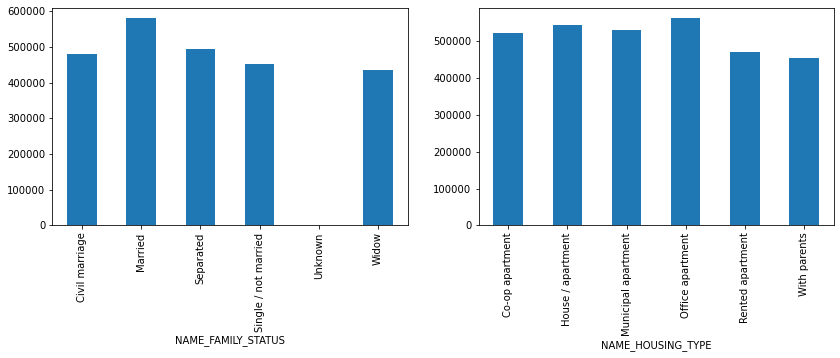

In [20]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1.groupby('NAME_FAMILY_STATUS')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.subplot(1,2,2)
curr_app1.groupby('NAME_HOUSING_TYPE')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.show()

### Inferences 
#### For imputing AMT_GOODS_PRICE
- Majority of the clients are married and have houses or apartments with an average goods price > 500,000
- Therefore, all missing values under AMT_GOODS_PRICE column can be imputed with the value of 500,000

### Imputing criteria for the variable NAME_TYPE_SUITE

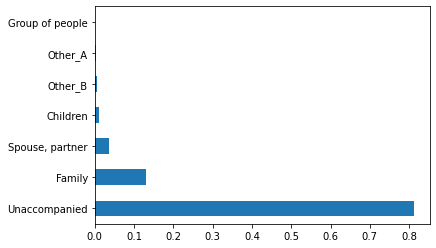

In [21]:
curr_app1['NAME_TYPE_SUITE'].value_counts(normalize=True).plot.barh()
plt.show()

### Inferences 
#### For imputing NAME_TYPE_SUITE
- Since majority of the clients were unaccompained (81%) during loan application. Therefore, missing values under NAME_TRYPE_SUITE can be imputed with "Unaccompained".

### Imputing criteria for the variable EXT_SOURCE_2

In [22]:
curr_app1['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [23]:
curr_app1.groupby('NAME_INCOME_TYPE')[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','EXT_SOURCE_2']].mean()

AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE  \
NAME_INCOME_TYPE                                                        
Businessman              652500.000000  1.228500e+06     1.228500e+06   
Commercial associate     202955.327289  6.699131e+05     6.031804e+05   
Maternity leave          140400.000000  7.497000e+05     7.497000e+05   
Pensioner                136401.292273  5.425461e+05     4.881586e+05   
State servant            179737.969506  6.698193e+05     6.024241e+05   
Student                  170500.000000  5.107875e+05     4.582500e+05   
Unemployed               110536.363636  7.643864e+05     7.643864e+05   
Working                  163169.889223  5.770110e+05     5.178644e+05   

                      EXT_SOURCE_2  
NAME_INCOME_TYPE                    
Businessman               0.666350  
Commercial associate      0.542199  
Maternity leave           0.512095  
Pensioner                 0.506451  
State servant             0.534559  
Student                   0.500003  
Unemployed                0.459349  
Working                   0.501860

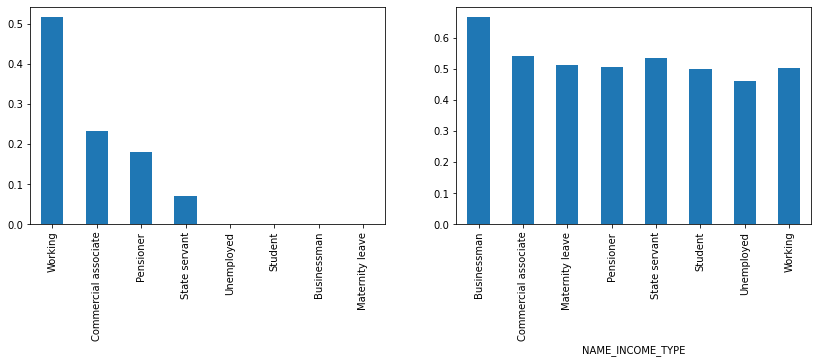

In [24]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
curr_app1.groupby('NAME_INCOME_TYPE')['EXT_SOURCE_2'].mean().plot.bar()
plt.show()

### Inferences 
#### For imputing EXT_SOURCE_2 
- The income type of the majority clients are falling in working, commercial associates and pensioner (~93%). The average scores from the external sources for these income type categories are 0.5. Therefore, the null values can be imputed with the score 0.5.

### Imputing criteria for the variables
##### - OBS_30_CNT_SOCIAL_CIRCLE 
##### - OBS_60_CNT_SOCIAL_CIRCLE
##### - DEF_60_CNT_SOCIAL_CIRCLE

In [25]:
curr_app1[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  1.405292   
std                    2.400989                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  2.000000   
max                  348.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000  
mean                   0.100049  
std                    0.362291  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                   24.000000

### Inferences 
#### For imputing observed and actual defaulters are present in client's social surroundings 
- 75% of the clients surrounding is with maximum '2' defaulters under observed 30-60 DPD and with '0' actual defaulters under 60 DPD

### Q5. Identify the columns with incorrect datatype (At least 10 columns) - Conversions
   - Categorical data shall be object dtype
   - Continuous data shall be in int/float dtype
   - Negative age or date to positives using absolute values

In [26]:
for c in curr_app1.columns:
    print("\n---- %s ---" % c)
    print(curr_app1[c].value_counts())
    print("Data Type: %s" % curr_app1[c].dtypes)


---- SK_ID_CURR ---
100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
Data Type: int64

---- TARGET ---
0    282686
1     24825
Name: TARGET, dtype: int64
Data Type: int64

---- NAME_CONTRACT_TYPE ---
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
Data Type: object

---- CODE_GENDER ---
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
Data Type: object

---- FLAG_OWN_CAR ---
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Data Type: object

---- FLAG_OWN_REALTY ---
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Data Type: object

---- CNT_CHILDREN ---
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype:

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

0.9871    4291
0.9866    4173
0.9861    4167
0.9801    4110
0.9806    4083
0.9856    4075
0.9851    4016
0.9816    3976
0.9796    3974
0.9791    3935
0.9831    3904
0.9876    3892
0.9782    3808
0.9821    3794
0.9841    3791
0.9811    3790
0.9846    3785
0.9786    3689
0.9836    3669
0.9826    3625
0.9777    3581
0.9772    3513
0.9881    3319
0.9767    3300
0.9762    3077
0.9742    2991
0.9747    2874
0.9737    2861
0.9757    2833
0.9752    2827
0.9886    2790
0.9732    2610
0.9891    2385
0.9727    2372
0.9896    2361
0.9722    2067
0.9901    1850
0.9717    1582
0.9906    1424
0.9970    1137
0.9712    1107
0.9975    1103
0.9911    1065
0.9980    1065
0.9985    1053
0.9965     945
0.9990     915
0.9707     895
0.9916     883
0.9702     878
0.9960     871
0.9697     787
0.9921     766
0.9692     747
0.9955     720
0.9995     702
0.9926     679
0.9950     677
0.9518     670
0.9945     656
0.9930     645
0.9935     596
0.9940     591
0.9687     573
0.9682     546
0.0005     525
0.9677    

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
Data Type: float64

---- DEF_30_CNT_SOCIAL_CIRCLE ---
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
Data Type: float64

---- OBS_60_CNT_SOCIAL_CIRCLE ---
0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4

In [27]:
wrong_type_list = ['DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
print("No of cols with wrong dtypes is: %s" % len(wrong_type_list))
right_type_list = [int, int, int, int, int, int, int, int, int, int, int, int, int]
print("length of right_type_list is: %s" % len(wrong_type_list))

print(curr_app1[wrong_type_list].dtypes)


No of cols with wrong dtypes is: 13
length of right_type_list is: 13
DAYS_REGISTRATION             float64
CNT_FAM_MEMBERS               float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object


In [28]:
type_map_zip = zip(wrong_type_list, right_type_list)
type_map_dict = dict(type_map_zip)
type_map_dict

{'DAYS_REGISTRATION': int,
 'CNT_FAM_MEMBERS': int,
 'OBS_30_CNT_SOCIAL_CIRCLE': int,
 'DEF_30_CNT_SOCIAL_CIRCLE': int,
 'OBS_60_CNT_SOCIAL_CIRCLE': int,
 'DEF_60_CNT_SOCIAL_CIRCLE': int,
 'DAYS_LAST_PHONE_CHANGE': int,
 'AMT_REQ_CREDIT_BUREAU_HOUR': int,
 'AMT_REQ_CREDIT_BUREAU_DAY': int,
 'AMT_REQ_CREDIT_BUREAU_WEEK': int,
 'AMT_REQ_CREDIT_BUREAU_MON': int,
 'AMT_REQ_CREDIT_BUREAU_QRT': int,
 'AMT_REQ_CREDIT_BUREAU_YEAR': int}

In [29]:
curr_app1 = curr_app1.fillna(0).astype(type_map_dict)
print(curr_app1[wrong_type_list].dtypes)

DAYS_REGISTRATION             int64
CNT_FAM_MEMBERS               int64
OBS_30_CNT_SOCIAL_CIRCLE      int64
DEF_30_CNT_SOCIAL_CIRCLE      int64
OBS_60_CNT_SOCIAL_CIRCLE      int64
DEF_60_CNT_SOCIAL_CIRCLE      int64
DAYS_LAST_PHONE_CHANGE        int64
AMT_REQ_CREDIT_BUREAU_HOUR    int64
AMT_REQ_CREDIT_BUREAU_DAY     int64
AMT_REQ_CREDIT_BUREAU_WEEK    int64
AMT_REQ_CREDIT_BUREAU_MON     int64
AMT_REQ_CREDIT_BUREAU_QRT     int64
AMT_REQ_CREDIT_BUREAU_YEAR    int64
dtype: object


#### Conversion from negative values to absolute

In [30]:
curr_app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637              -3648   
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [31]:
curr_app1[['DAYS_BIRTH', 
           'DAYS_EMPLOYED', 
           'DAYS_REGISTRATION', 
           'DAYS_ID_PUBLISH',
          'DAYS_LAST_PHONE_CHANGE']] = curr_app1[['DAYS_BIRTH', 
                                            'DAYS_EMPLOYED', 
                                            'DAYS_REGISTRATION', 
                                            'DAYS_ID_PUBLISH',
                                            'DAYS_LAST_PHONE_CHANGE']].abs()
                                                                                                
                                                                                                
curr_app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### Q6. Min 5 columns (numerical) identify the outliers (no treatment for outliers is required)

In [32]:
curr_app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [33]:
cols_outliers = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2']

### Methodology for identifying outliers
- Check for the normality of the distribution
- If it is normal distribution we would use the parametric tests and z-score method can be used to identify outliers
- If not normal then we can use either IQR method or Gubbs test to identify the outliers

In [34]:
df_outliers = curr_app1[cols_outliers]
df_outliers.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  EXT_SOURCE_2
0          202500.0    406597.5      24700.5         351000.0      0.262949
1          270000.0   1293502.5      35698.5        1129500.0      0.622246
2           67500.0    135000.0       6750.0         135000.0      0.555912
3          135000.0    312682.5      29686.5         297000.0      0.650442
4          121500.0    513000.0      21865.5         513000.0      0.322738

In [35]:
df_outliers.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307511.000000     3.075110e+05   
mean       1.687979e+05  5.990260e+05   27107.516051     5.379095e+05   
std        2.371231e+05  4.024908e+05   14494.443757     3.696338e+05   
min        2.565000e+04  4.500000e+04       0.000000     0.000000e+00   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

        EXT_SOURCE_2  
count  307511.000000  
mean        0.513289  
std         0.192334  
min         0.000000  
25%         0.390782  
50%         0.565467  
75%         0.663422  
max         0.855000

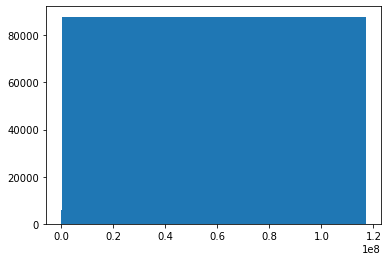

In [36]:
plt.hist(df_outliers.AMT_INCOME_TOTAL, bins=[25650, 50000, 100000, 112500, 125000, 147150, 202500, 117000000])
plt.show()

In [37]:
from scipy import stats
import statsmodels.api as sm
import pylab

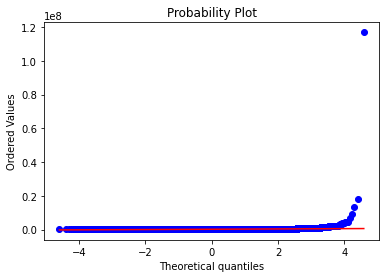

In [38]:
stats.probplot(df_outliers.AMT_INCOME_TOTAL, dist="norm", plot=plt)
plt.show()

- Clearly the Q-Q plot suggesting the the curve is positively skewed and after 20 percentile the values are pretty extreme
- We can also utilize the Shaprio hypothesis test to justify that the distribution is not normal

In [39]:
from scipy.stats import shapiro

In [40]:
stat, p = shapiro(df_outliers.AMT_INCOME_TOTAL)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.138, p=0.000


- H0 => There is normality in the distribution
- H1 => Distribution is not normal
- Here p-value<0.05 which means we can reject the H0. Therefore, the distribution is not normal
- In this case we need to perform the non-parametric test

In [41]:
df_outliers.AMT_INCOME_TOTAL.quantile([0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75])

0.05     67500.0
0.10     81000.0
0.15     90000.0
0.20     99000.0
0.25    112500.0
0.50    147150.0
0.75    202500.0
Name: AMT_INCOME_TOTAL, dtype: float64

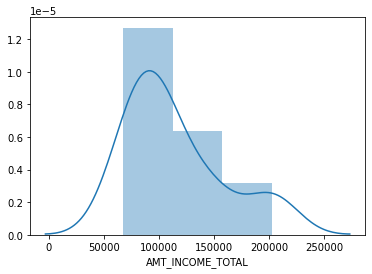

In [42]:
sns.distplot(df_outliers.AMT_INCOME_TOTAL.quantile([0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75]))
plt.show()

#### IQR Method for identifying the outliers

In [43]:
income_Q1 = df_outliers.AMT_INCOME_TOTAL.quantile(0.25)
income_Q3 = df_outliers.AMT_INCOME_TOTAL.quantile(0.75)

In [44]:
IQR_income =  income_Q3 - income_Q1
IQR_income

90000.0

In [45]:
income_min_out = abs(income_Q1 - IQR_income*1.5)
income_min_out

22500.0

In [46]:
income_max_out = income_Q3 + IQR_income*1.5
income_max_out

337500.0

#### We can now remove all values below 22500 and above 337500 from "AMT_INCOME_TOTAL" as outliers


#### Alternative method: Grubbs method to identify outliers
- from outliers import smirnov_grubbs as grubbs
- grubbs.test(df_outliers.AMT_INCOME_TOTAL, alpha=0.05)
- grubbs.min_test_indices(df_outliers.AMT_INCOME_TOTAL, alpha=0.05)
- grubbs.max_test_indices(df_outliers.AMT_INCOME_TOTAL, alpha=0.05)

Similary we apply the same method in other variables as well
- Columns: AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, EXT_SOURCE_2

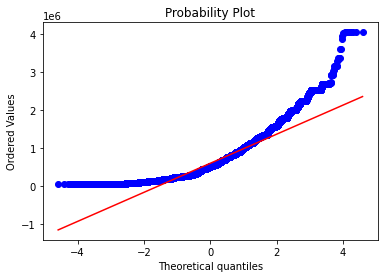

In [47]:
stats.probplot(df_outliers.AMT_CREDIT, dist="norm", plot=plt)
plt.show()

Extreme outliers in both lower and upper ends

In [48]:
credit_Q1 = df_outliers.AMT_CREDIT.quantile(0.25)
credit_Q3 = df_outliers.AMT_CREDIT.quantile(0.75)

In [49]:
IQR_credit =  credit_Q3 - credit_Q1
IQR_income

90000.0

In [50]:
credit_min_out = abs(credit_Q1 - IQR_credit*1.5)
credit_min_out

537975.0

In [51]:
credit_max_out = credit_Q3 + IQR_credit*1.5
credit_max_out

1616625.0

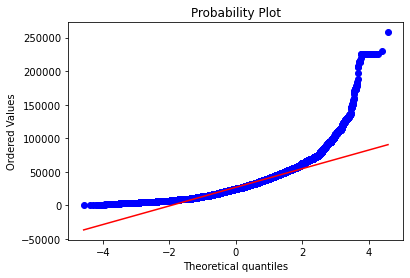

In [52]:
stats.probplot(df_outliers.AMT_ANNUITY, dist="norm", plot=plt)
plt.show()

In [53]:
annuity_Q1 = df_outliers.AMT_ANNUITY.quantile(0.25)
annuity_Q3 = df_outliers.AMT_ANNUITY.quantile(0.75)
IQR_annuity =  annuity_Q3 - annuity_Q1

In [54]:
annuity_min_out = abs(annuity_Q1 - IQR_annuity*1.5)
annuity_min_out


10584.0

In [55]:
annuity_max_out = annuity_Q3 + IQR_annuity*1.5
annuity_max_out

61704.0

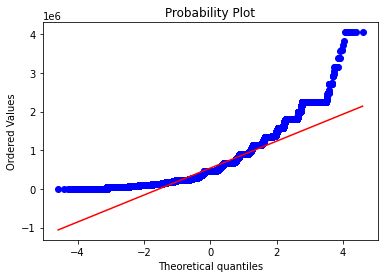

In [56]:
stats.probplot(df_outliers.AMT_GOODS_PRICE, dist="norm", plot=plt)
plt.show()

In [57]:
goods_Q1 = df_outliers.AMT_GOODS_PRICE.quantile(0.25)
goods_Q3 = df_outliers.AMT_GOODS_PRICE.quantile(0.75)
IQR_goods =  goods_Q3 - goods_Q1

In [58]:
goods_min_out = abs(goods_Q1 - IQR_goods*1.5)
goods_min_out

423000.0

In [59]:
goods_max_out = goods_Q3 + IQR_goods*1.5
goods_max_out

1341000.0

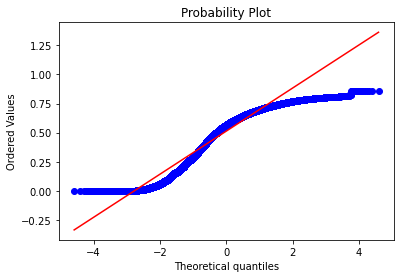

In [60]:
stats.probplot(df_outliers.EXT_SOURCE_2, dist="norm", plot=plt)
plt.show()

In [61]:
score_Q1 = df_outliers.EXT_SOURCE_2.quantile(0.25)
score_Q3 = df_outliers.EXT_SOURCE_2.quantile(0.75)
IQR_score =  score_Q3 - score_Q1

In [62]:
score_min_out = abs(score_Q1 - IQR_score*1.5)
score_min_out

0.01817672256009728

In [63]:
score_max_out = score_Q3 + IQR_score*1.5
score_max_out

1.0723809171829768

##### Identified outlier ranges
- Income: <22500.0 and >337500.0
- Credit: <537975.0 and >1616625.0
- Annuity: <10584.0 and >61704.0
- Goods price: <423000.0 and >1341000.0
- External source scores: <0.018 and >1.07

### Q7. Creating bins from a continuous data (minimum two columns)

In [64]:
curr_app1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   
5                    0.035792       16941           1588               4970   
6                    0.035792       13778           3130               1213   
7                    0.003122       18850            449               4597   
8                    0.018634       20099         365243               7427   
9                    0.019689       14469           2019              1443

In [65]:
curr_app1['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
cut_labels = ['<50K', '50K-1L', '1-2.5L', '2.5-5L', '5-10L', '>10L']
cut_bins = [0, 50000, 100000, 250000, 500000, 1000000, 117000000]
curr_app1['Income_Bin'] = pd.cut(curr_app1['AMT_INCOME_TOTAL'], bins=cut_bins, labels=cut_labels)
curr_app1.Income_Bin.value_counts(normalize=True)

1-2.5L    0.663505
50K-1L    0.192452
2.5-5L    0.120568
<50K      0.014689
5-10L     0.007974
>10L      0.000813
Name: Income_Bin, dtype: float64

In [67]:
curr_app1['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [68]:
curr_app1['Credit_Bin'] = pd.cut(curr_app1['AMT_CREDIT'], bins=cut_bins, labels=cut_labels)
curr_app1.Credit_Bin.value_counts(normalize=True)

5-10L     0.351835
2.5-5L    0.293111
1-2.5L    0.172982
>10L      0.162547
50K-1L    0.017700
<50K      0.001824
Name: Credit_Bin, dtype: float64

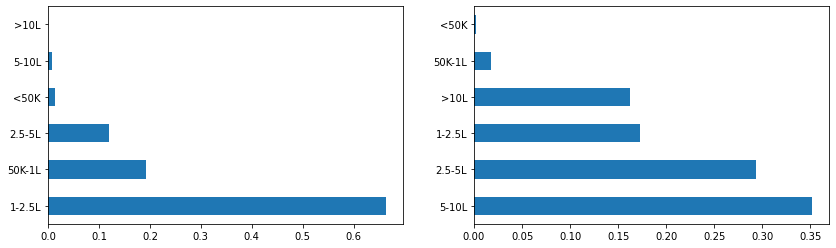

In [69]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1.Income_Bin.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
curr_app1.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.show()

### Q8. Identify if there is data imbalance in the data. Find the ratio of data imbalance.

        Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.
        
        Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)



In [70]:
curr_app1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

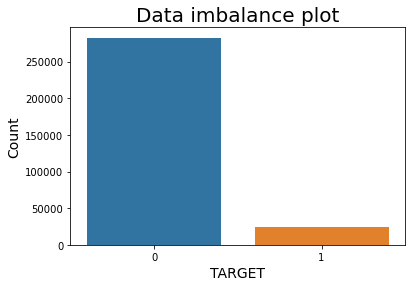

In [71]:
sns.barplot(x=curr_app1.TARGET.value_counts().index, y = curr_app1.TARGET.value_counts().values)
plt.xlabel("TARGET", size=14)
plt.ylabel("Count", size=14)
plt.title("Data imbalance plot", size=20)
plt.show()

### 9. Create two dataframes using target column (0, 1). Using these two sub dataframes we need to identify top 10 correlations (min 10 variables)
- Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  
    - Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. 
    - Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing. 
- We can take only 20-25 columns for performing univariate and bivariate analysis
    - Univariate: 
        - Categorical
        - Continuous
    - Bivariate: 
        - Categorical - Categorical
        - Categorical - Continuous
        - Continuous - Continuous
    - min 5 plots for each analysis (Total 25 plots)
#### Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.


#### Creating dataframes using target variable
- curr_app1_1: With payment difficulties
- curr_app1_0: Others

In [72]:
curr_app1_1 = curr_app1[curr_app1.TARGET==1]
curr_app1_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637               3648   
26                    0.018029       18724           2628               6573   
40                    0.025164       17482           1262               1182   
42                    0.007305       13384           3597                 45   
81                    0.028663       24794         365243               5391   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers                1   
26                 1           0           0   Cooking staff                1   
40                 1           0           0        Laborers                2   
42                 1           1           0     Sales staff                2   
81                 1           0           0               0                2   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40               

In [73]:
curr_app1_0 = curr_app1[curr_app1.TARGET==0]
curr_app1_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   
5                    0.035792       16941           1588               4970   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   
5                 1           1           0        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

### Identifying top10 correlations among numerical variables of df - curr_app1_1

In [74]:
curr_app1_1_num = curr_app1_1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                               'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
                               'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
curr_app1_1_num.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  EXT_SOURCE_2  \
0           202500.0    406597.5      24700.5         351000.0      0.262949   
26          112500.0    979992.0      27076.5         702000.0      0.548477   
40          202500.0   1193580.0      35028.0         855000.0      0.306841   
42          135000.0    288873.0      16258.5         238500.0      0.674203   
81           81000.0    252000.0      14593.5         252000.0      0.023952   

    EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0       0.139376                         2                         2   
26      0.190706                        10                         1   
40      0.320163                         0                         0   
42      0.399676                         1                         0   
81      0.720944                         1                         1   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                          2                         2  
26                        10                         0  
40                         0                         0  
42                         1                         0  
81                         1                         1

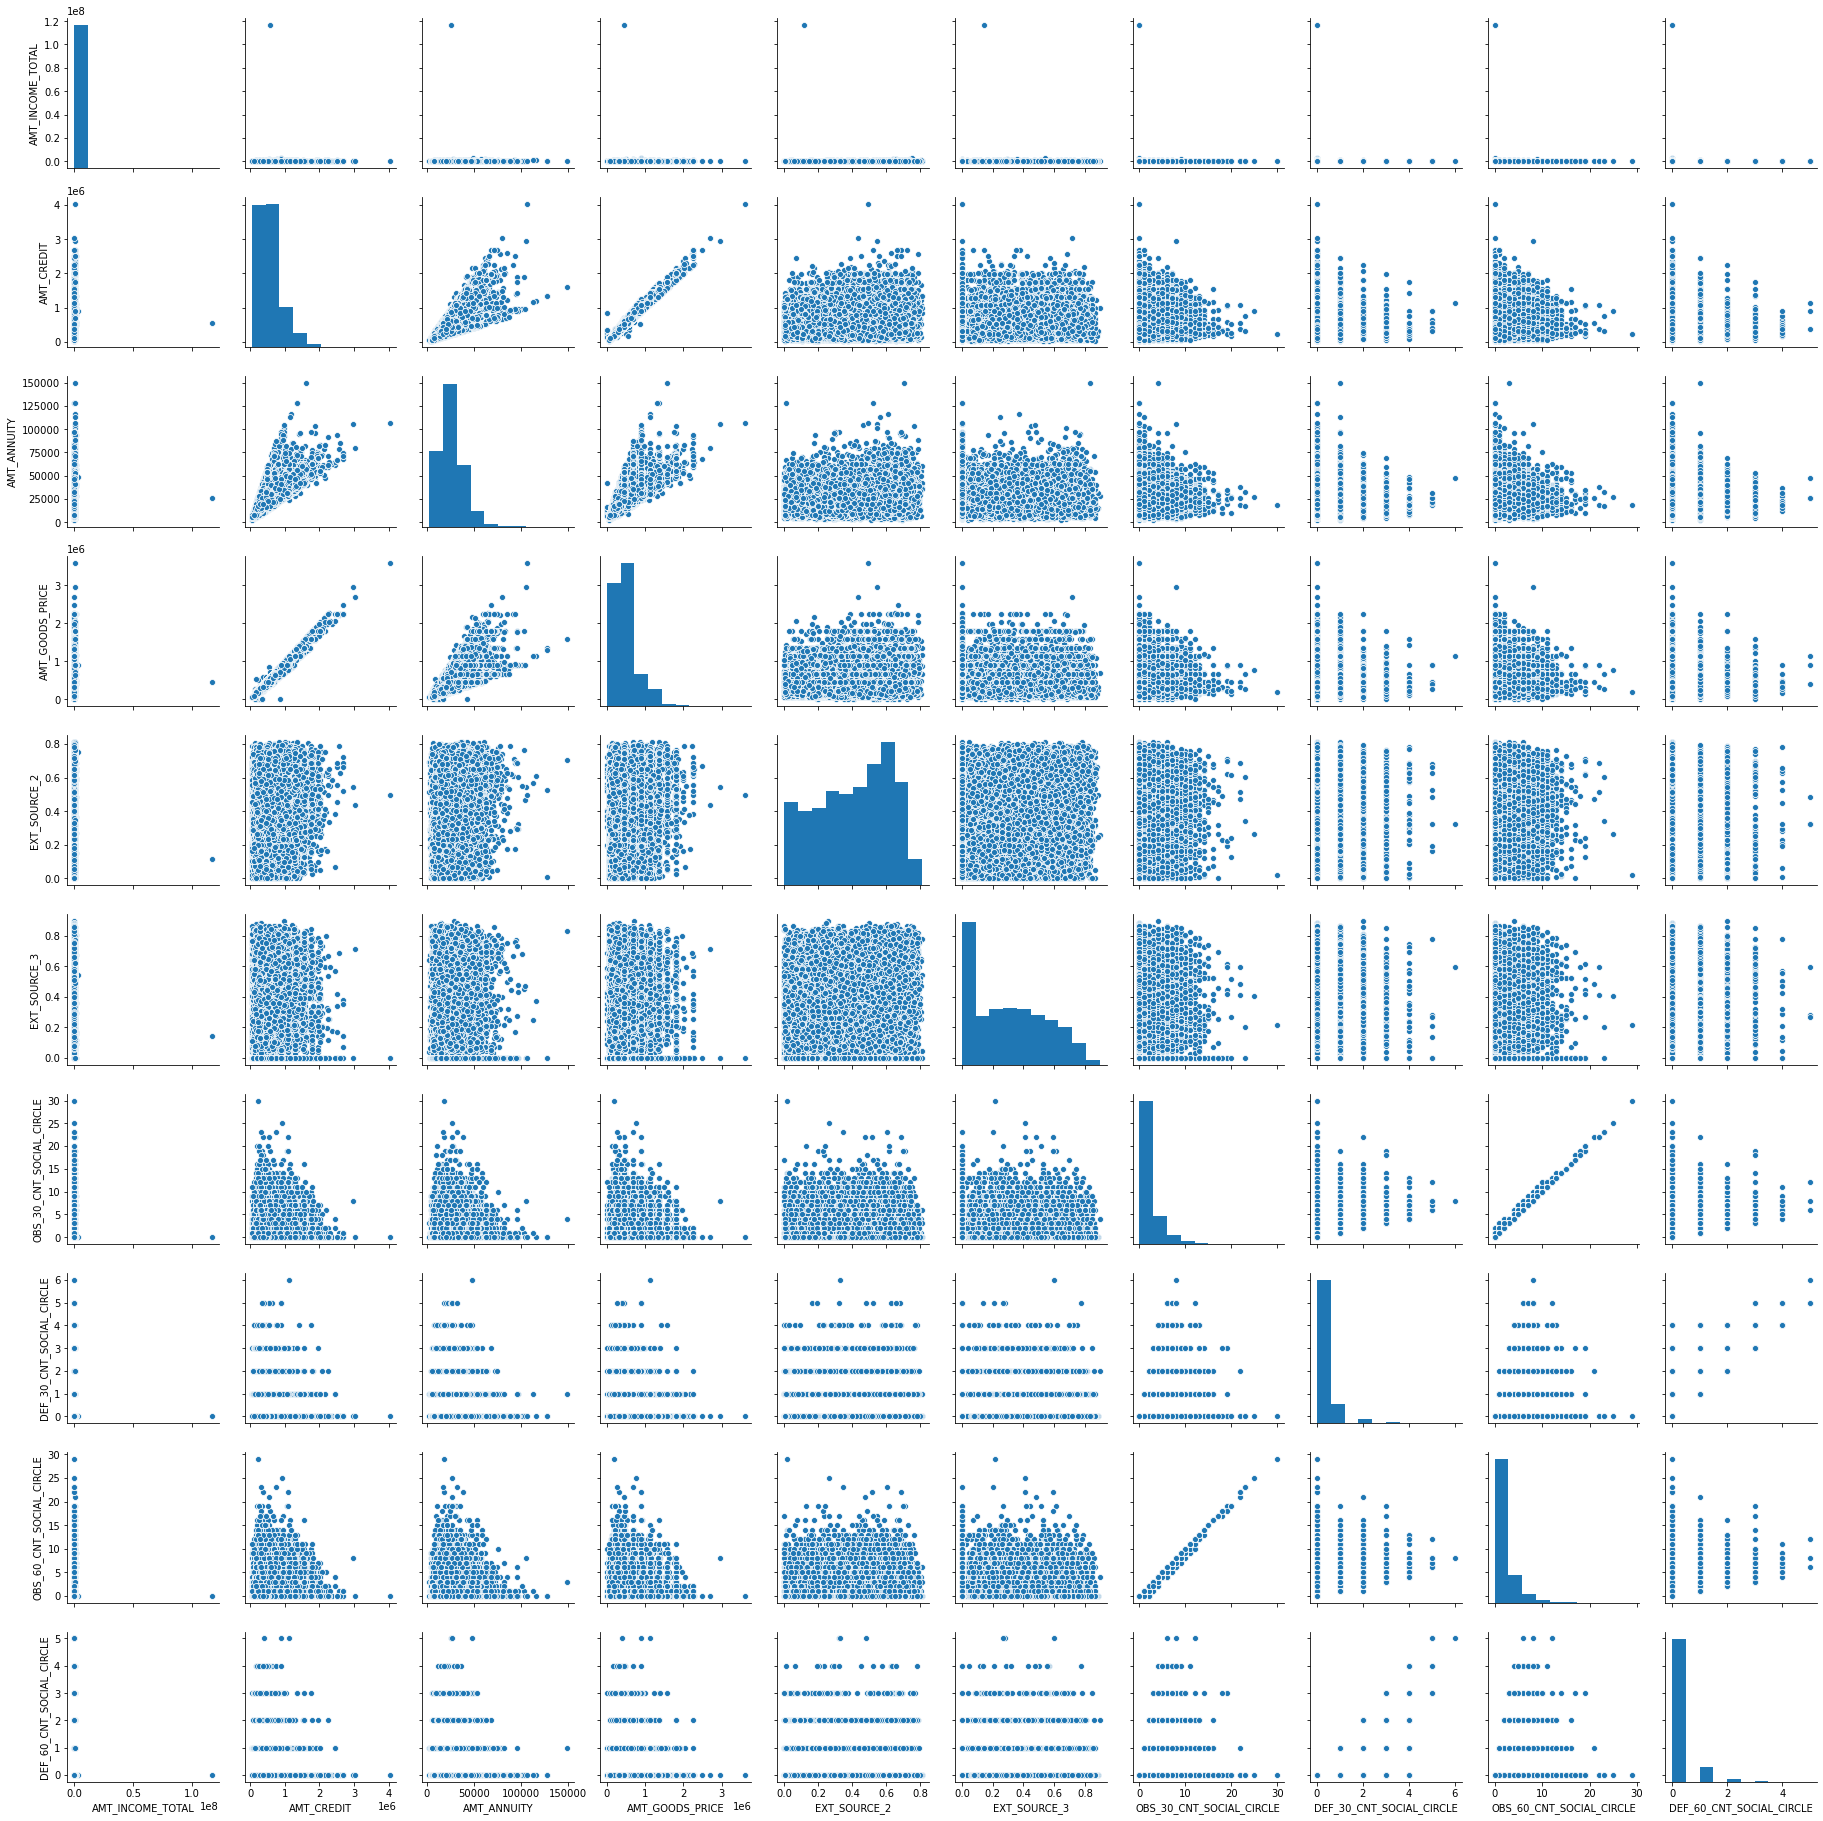

In [75]:
sns.pairplot(curr_app1_1_num)
plt.show()

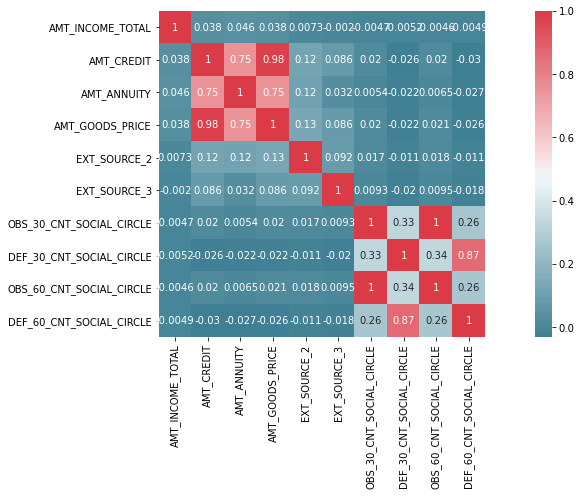

In [76]:
f, ax = plt.subplots(figsize=(18, 6))
corr = curr_app1_1_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

### Identifying top10 correlations among numerical variables of df - curr_app1_0

In [77]:
curr_app1_0_num = curr_app1_0[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                               'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
                               'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
curr_app1_0_num.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  EXT_SOURCE_2  \
1          270000.0   1293502.5      35698.5        1129500.0      0.622246   
2           67500.0    135000.0       6750.0         135000.0      0.555912   
3          135000.0    312682.5      29686.5         297000.0      0.650442   
4          121500.0    513000.0      21865.5         513000.0      0.322738   
5           99000.0    490495.5      27517.5         454500.0      0.354225   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1      0.000000                         1                         0   
2      0.729567                         0                         0   
3      0.000000                         2                         0   
4      0.000000                         0                         0   
5      0.621226                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
1                         1                         0  
2                         0                         0  
3                         2                         0  
4                         0                         0  
5                         0                         0

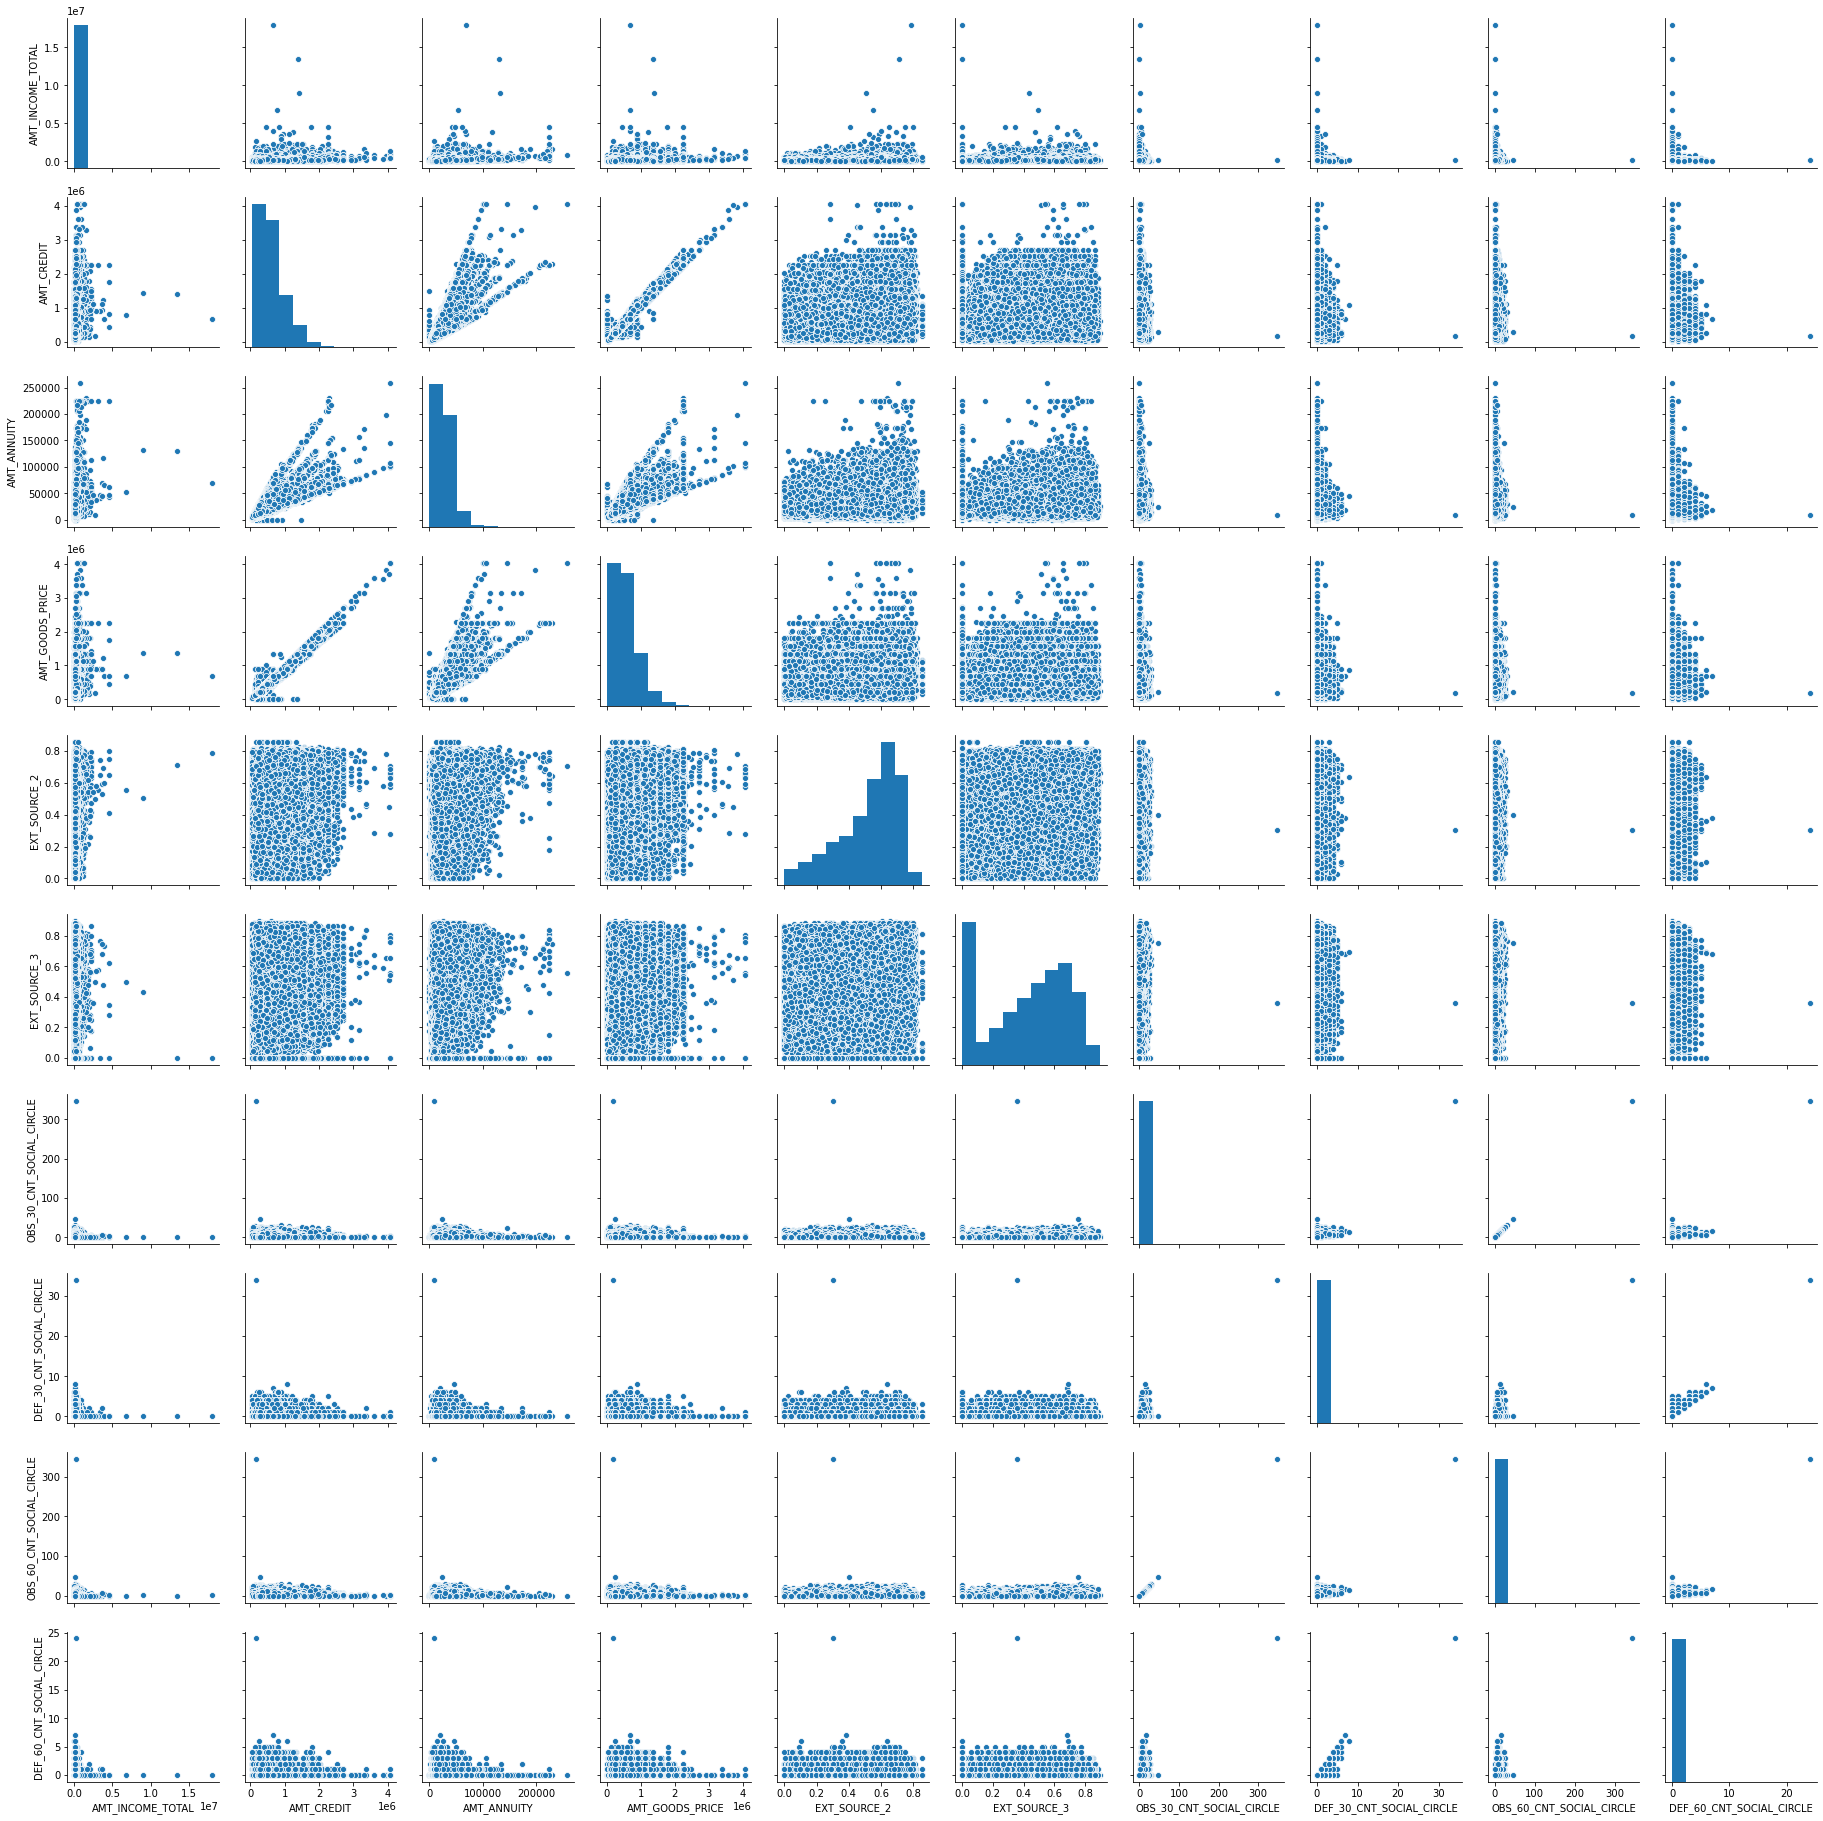

In [78]:
sns.pairplot(curr_app1_0_num)
plt.show()

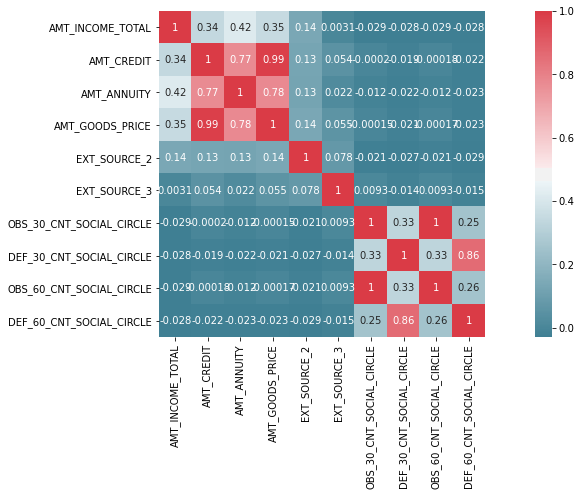

In [79]:
f, ax = plt.subplots(figsize=(18, 6))
corr = curr_app1_0_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

### Univariate analysis using df - curr_app1_1

#### Numerical variables

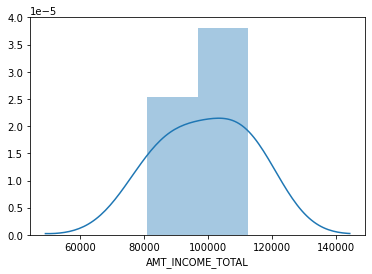

In [80]:
sns.distplot(curr_app1_1.AMT_INCOME_TOTAL.quantile([0.1, 0.15, 0.2, 0.25, 0.3]))
plt.show()

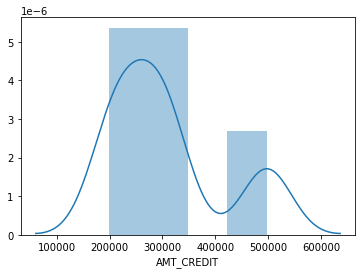

In [81]:
sns.distplot(curr_app1_1.AMT_CREDIT.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

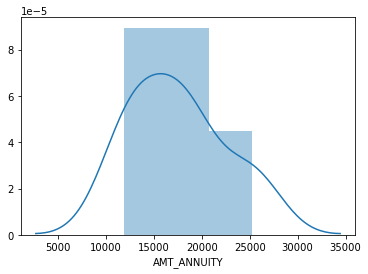

In [82]:
sns.distplot(curr_app1_1.AMT_ANNUITY.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

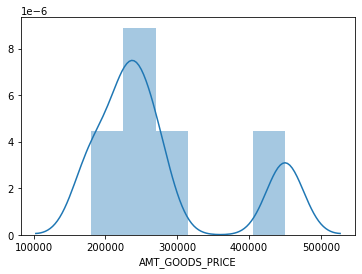

In [83]:
sns.distplot(curr_app1_1.AMT_GOODS_PRICE.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

#### Categorical variables

In [84]:
curr_app1_1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

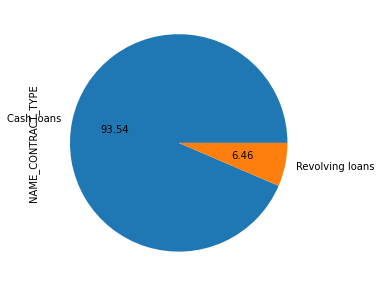

In [85]:
curr_app1_1['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

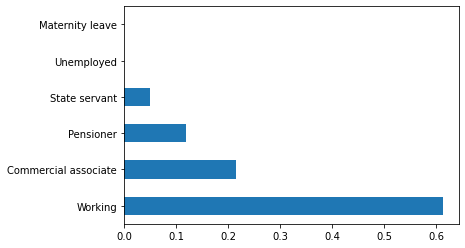

In [86]:
curr_app1_1['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

In [87]:
curr_app1_1['OCCUPATION_TYPE'].value_counts(normalize=True)

0                        0.252890
Laborers                 0.235166
Sales staff              0.124552
Drivers                  0.084874
Core staff               0.070010
Managers                 0.053494
Security staff           0.029084
High skill tech staff    0.028238
Cooking staff            0.025015
Medicine staff           0.023041
Accountants              0.019094
Cleaning staff           0.018006
Low-skill Laborers       0.014461
Private service staff    0.007049
Waiters/barmen staff     0.006123
Secretaries              0.003706
Realty agents            0.002377
HR staff                 0.001450
IT staff                 0.001370
Name: OCCUPATION_TYPE, dtype: float64

In [88]:
curr_app1_1['OCCUPATION_TYPE'].isnull().sum() ### What is this 0 value???

0

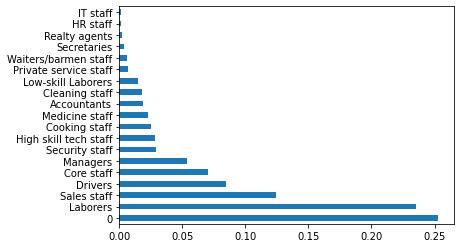

In [89]:
curr_app1_1['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

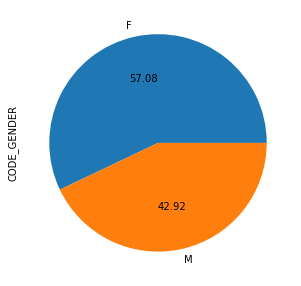

In [90]:
curr_app1_1['CODE_GENDER'].value_counts(normalize=True).plot.pie(figsize=(10,5), autopct='%.2f', fontsize=10)
plt.show()

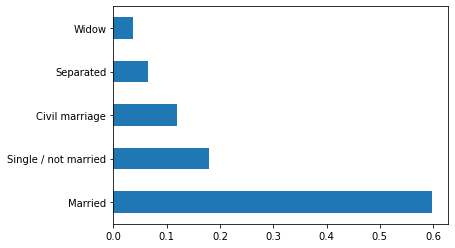

In [91]:
curr_app1_1['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.barh()
plt.show()

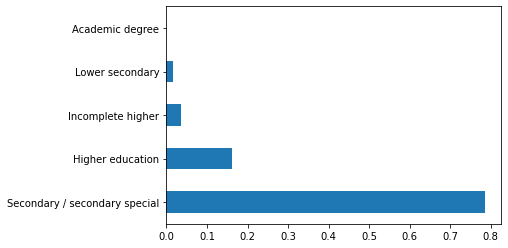

In [92]:
curr_app1_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

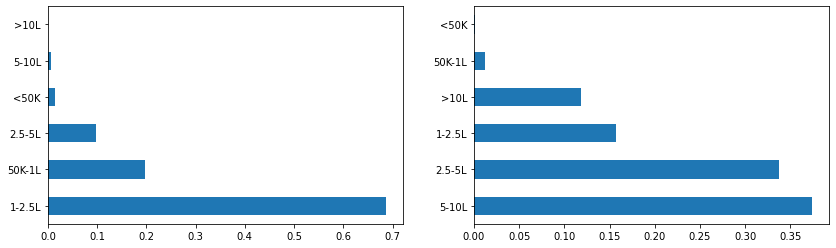

In [93]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1_1.Income_Bin.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
curr_app1_1.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.show()

### Univariate analysis using df - curr_app1_0

### Numerical variables

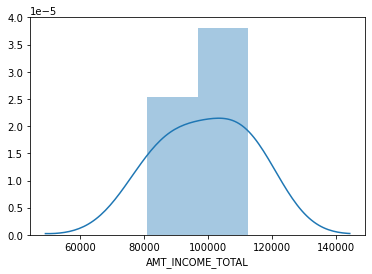

In [94]:
sns.distplot(curr_app1_0.AMT_INCOME_TOTAL.quantile([0.1, 0.15, 0.2, 0.25, 0.3]))
plt.show()

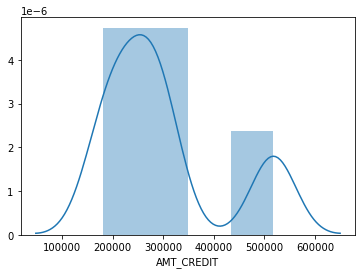

In [95]:
sns.distplot(curr_app1_0.AMT_CREDIT.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

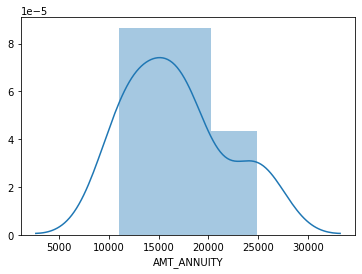

In [96]:
sns.distplot(curr_app1_0.AMT_ANNUITY.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

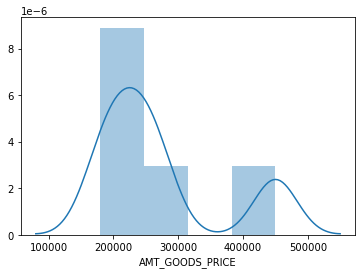

In [97]:
sns.distplot(curr_app1_0.AMT_GOODS_PRICE.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

### Categorical variables

In [98]:
curr_app1_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.9021
Revolving loans    0.0979
Name: NAME_CONTRACT_TYPE, dtype: float64

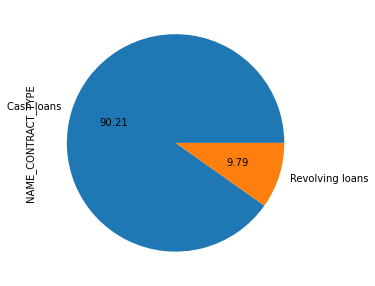

In [99]:
curr_app1_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

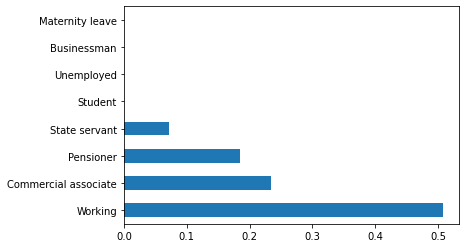

In [100]:
curr_app1_0['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

In [101]:
curr_app1_0['OCCUPATION_TYPE'].value_counts(normalize=True)

0                        0.318774
Laborers                 0.174568
Sales staff              0.102623
Core staff               0.091381
Managers                 0.070902
Drivers                  0.058354
High skill tech staff    0.037777
Accountants              0.033037
Medicine staff           0.028176
Security staff           0.021221
Cooking staff            0.018837
Cleaning staff           0.014879
Private service staff    0.008762
Low-skill Laborers       0.006134
Secretaries              0.004291
Waiters/barmen staff     0.004231
Realty agents            0.002448
HR staff                 0.001864
IT staff                 0.001740
Name: OCCUPATION_TYPE, dtype: float64

In [102]:
curr_app1_0['OCCUPATION_TYPE'].isnull().sum() ### What is this 0 value???

0

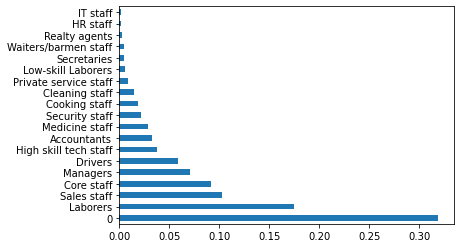

In [103]:
curr_app1_0['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

In [104]:
curr_app1_1["FLAG_OWN_CAR"].value_counts(normalize=True)*100

N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64

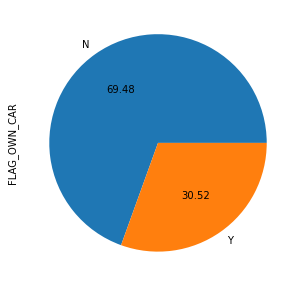

In [105]:
curr_app1_1["FLAG_OWN_CAR"].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

In [106]:
curr_app1_1["FLAG_OWN_REALTY"].value_counts(normalize=True)*100

Y    68.410876
N    31.589124
Name: FLAG_OWN_REALTY, dtype: float64

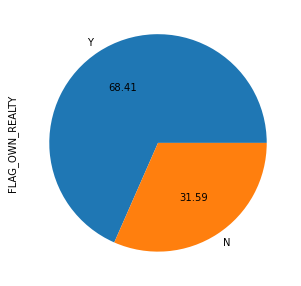

In [107]:
curr_app1_1["FLAG_OWN_REALTY"].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

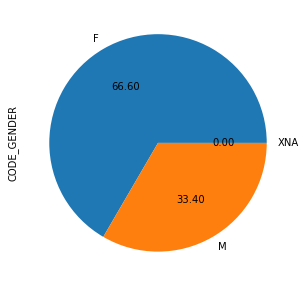

In [108]:
curr_app1_0['CODE_GENDER'].value_counts(normalize=True).plot.pie(figsize=(10,5), autopct='%.2f', fontsize=10)
plt.show()

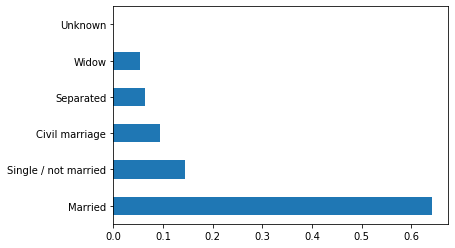

In [109]:
curr_app1_0['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.barh()
plt.show()

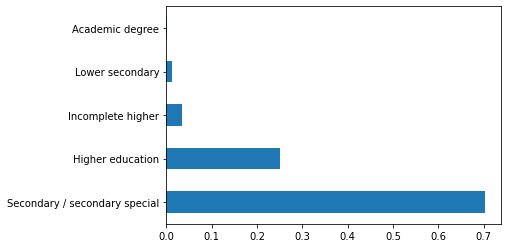

In [110]:
curr_app1_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

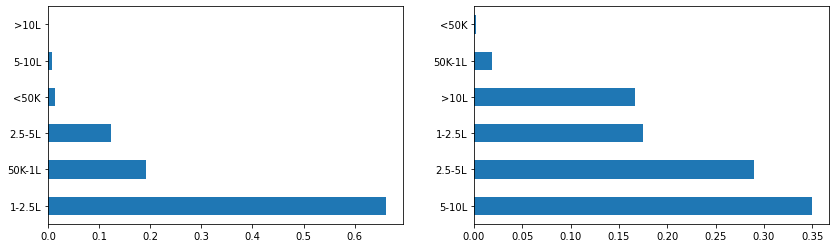

In [111]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1_0.Income_Bin.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
curr_app1_0.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.show()

### Bivariate analysis on curr_app1_1

#### Categorical - Numerical

##### Identified outlier ranges
- Income: <22500.0 and >337500.0
- Credit: <537975.0 and >1616625.0
- Annuity: <10584.0 and >61704.0
- Goods price: <423000.0 and >1341000.0
- External source scores: <0.018 and >1.07

In [112]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_1['AMT_INCOME_TOTAL'] = curr_app1_1[curr_app1_1['AMT_INCOME_TOTAL']<350000]

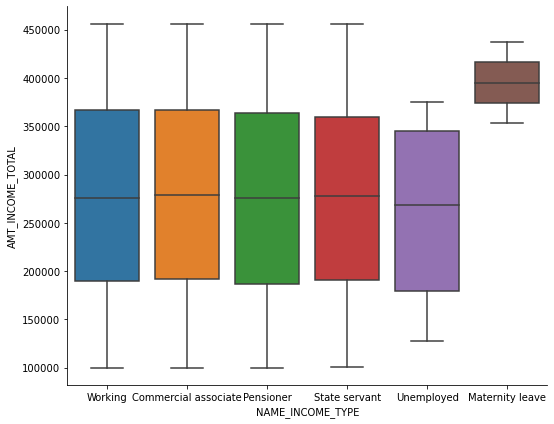

In [113]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

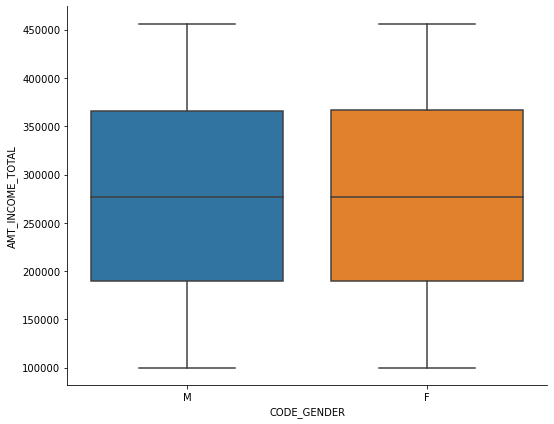

In [114]:
sns.catplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

In [115]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_1['AMT_CREDIT'] = curr_app1_1[curr_app1_1['AMT_CREDIT']<1616625]

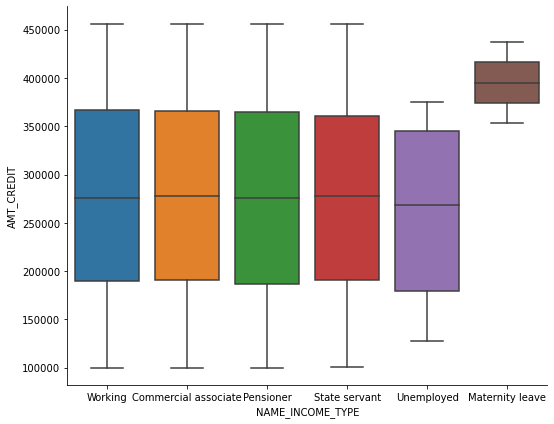

In [116]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

In [117]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_1['AMT_ANNUITY'] = curr_app1_1[curr_app1_1['AMT_ANNUITY']<61704]

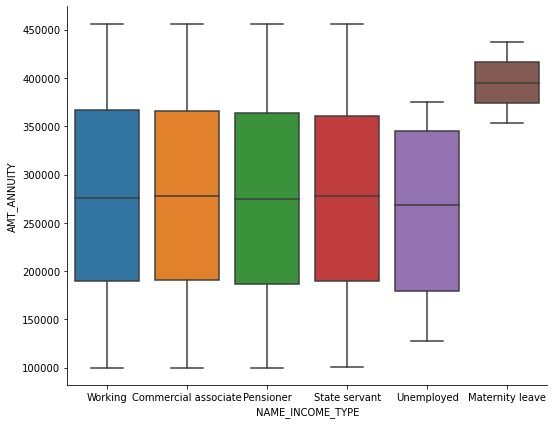

In [118]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

In [119]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_0['AMT_INCOME_TOTAL'] = curr_app1_0[curr_app1_0['AMT_INCOME_TOTAL']<350000]

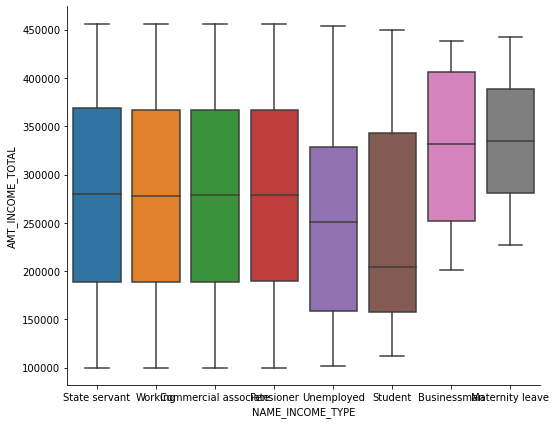

In [120]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=curr_app1_0, kind="box", height=6, aspect=1.3)
plt.show()

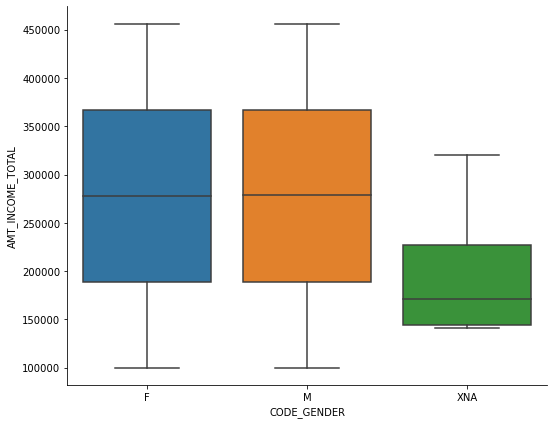

In [121]:
sns.catplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=curr_app1_0, kind="box", height=6, aspect=1.3)
plt.show()

In [122]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_0['AMT_CREDIT'] = curr_app1_0[curr_app1_0['AMT_CREDIT']<1616625]

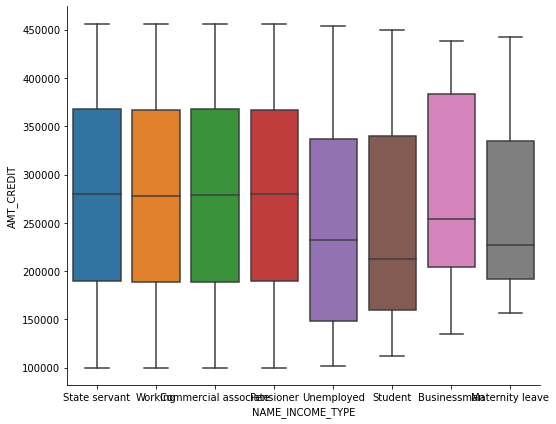

In [123]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=curr_app1_0, kind="box", height=6, aspect=1.3)
plt.show()

In [124]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_0['AMT_ANNUITY'] = curr_app1_0[curr_app1_0['AMT_ANNUITY']<61704]

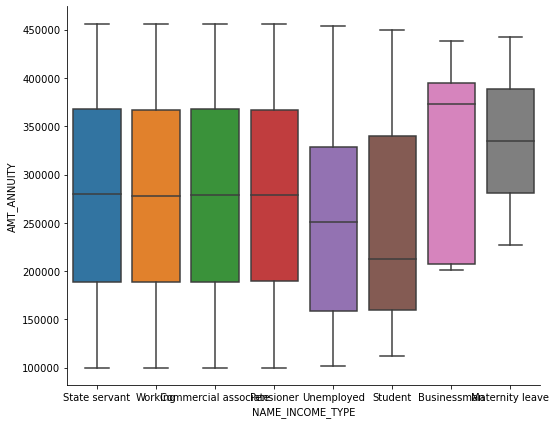

In [125]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', data=curr_app1_0, kind="box", height=6, aspect=1.3)
plt.show()

##### Categorical-Numerical

In [126]:
#function to find the 75th percentile.
def p35(x):
    return np.quantile(x, 0.35)

In [127]:
#calculate the mean, median and 75th percentile of balance with response
curr_app1.groupby('TARGET')['AMT_INCOME_TOTAL'].agg(['mean', 'median',p35])

mean    median       p35
TARGET                                   
0       169077.722266  148500.0  126000.0
1       165611.760906  135000.0  120873.6

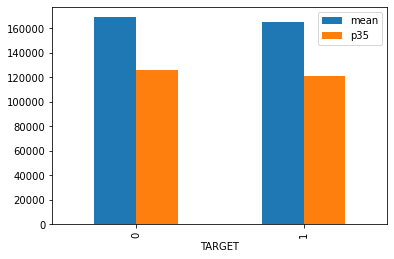

In [128]:
#plot the bar graph of balance's mean an median with response.
curr_app1.groupby('TARGET')['AMT_INCOME_TOTAL'].agg(['mean', p35]).plot.bar()
plt.show()

AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE

In [129]:
#calculate the mean, median and 75th percentile of credit with target variable
curr_app1.groupby('TARGET')['AMT_CREDIT'].agg(['mean', 'median', p35])

mean    median       p35
TARGET                                   
0       602648.282002  517788.0  352044.0
1       557778.527674  497520.0  360000.0

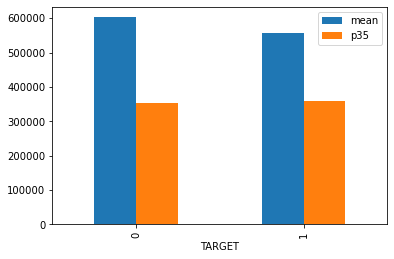

In [130]:
#plot the bar graph of balance's mean an median with target.
curr_app1.groupby('TARGET')['AMT_CREDIT'].agg(['mean', p35]).plot.bar()
plt.show()

In [131]:
#calculate the mean, median and 75th percentile of AMT_ANNUITY with target variable
curr_app1.groupby('TARGET')['AMT_ANNUITY'].agg(['mean', 'median',p35])

mean   median      p35
TARGET                                
0       27162.470255  24876.0  20088.0
1       26481.744290  25263.0  20889.0

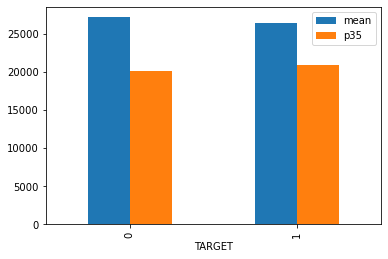

In [132]:
#plot the bar graph of balance's mean an median with target.
curr_app1.groupby('TARGET')['AMT_ANNUITY'].agg(['mean', p35]).plot.bar()
plt.show()

In [133]:
#calculate the mean, median and 75th percentile of AMT_GOODS_PRICE with target variable
curr_app1.groupby('TARGET')['AMT_GOODS_PRICE'].agg(['mean', 'median',p35])

mean    median       p35
TARGET                                   
0       542243.373482  450000.0  315000.0
1       488558.780302  450000.0  315000.0

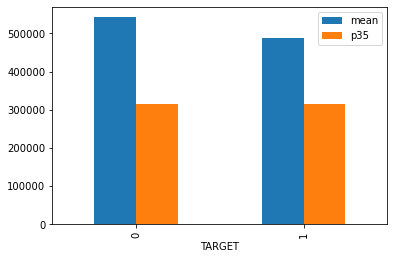

In [134]:
#plot the bar graph of balance's mean an median with target.
curr_app1.groupby('TARGET')['AMT_GOODS_PRICE'].agg(['mean', p35]).plot.bar()
plt.show()

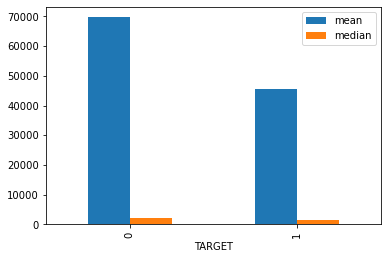

In [135]:
#plot the bar graph of balance's mean an median with target.
curr_app1.groupby('TARGET')['DAYS_EMPLOYED'].agg(['mean', 'median']).plot.bar()
plt.show()

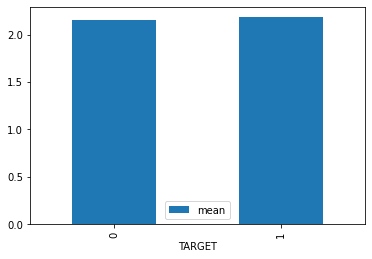

In [136]:
#plot the bar graph of balance's mean an median with target.
curr_app1.groupby('TARGET')['CNT_FAM_MEMBERS'].agg(['mean']).plot.bar()
plt.show()

#### Inferences:
- Clearly there is no significant difference between Target categories considering the income, credit, goods etc.

### Categorical - Categorical

In [137]:
curr_app1_cat = curr_app1[['TARGET', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','OCCUPATION_TYPE']]
                                    
curr_app1_cat.head()

TARGET            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS OCCUPATION_TYPE
0       1  Secondary / secondary special  Single / not married        Laborers
1       0               Higher education               Married      Core staff
2       0  Secondary / secondary special  Single / not married        Laborers
3       0  Secondary / secondary special        Civil marriage        Laborers
4       0  Secondary / secondary special  Single / not married      Core staff

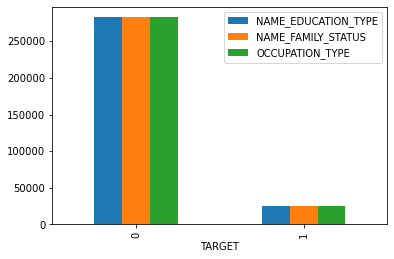

In [138]:
#plot the bar graph of balance's mean an median with target.
curr_app1.groupby('TARGET')[['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                             'OCCUPATION_TYPE']].agg('count').plot.bar()
plt.show()

# Univariate and Bivariate Analysis using previous application datasets

In [94]:
prev_app0.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [95]:
cut_labels = ['<50K', '50K-1L', '1-2.5L', '2.5-5L', '5-10L', '>10L']
cut_bins = [0, 50000, 100000, 250000, 500000, 1000000, 117000000]

In [96]:
prev_app0['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [97]:
prev_app0['Credit_Bin'] = pd.cut(prev_app0['AMT_CREDIT'], bins=cut_bins, labels=cut_labels)
prev_app0.Credit_Bin.value_counts(normalize=True)

1-2.5L    0.280278
<50K      0.239336
50K-1L    0.210631
2.5-5L    0.133476
5-10L     0.088663
>10L      0.047616
Name: Credit_Bin, dtype: float64

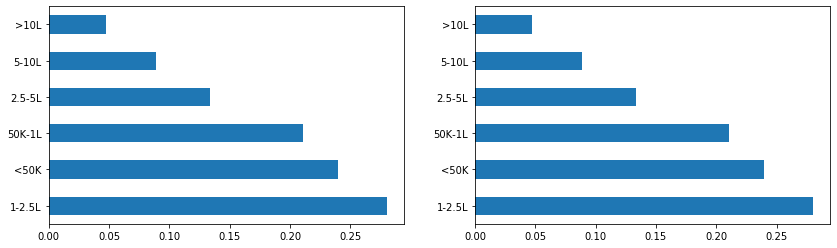

In [98]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
prev_app0.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
prev_app0.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.show()

### Target variable: Approval Status in the previous applications

In [99]:
prev_app0.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

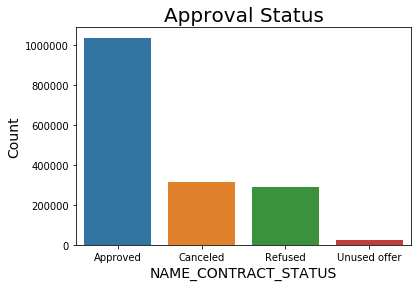

In [100]:
sns.barplot(x=prev_app0.NAME_CONTRACT_STATUS.value_counts().index, y = prev_app0.NAME_CONTRACT_STATUS.value_counts().values)
plt.xlabel("NAME_CONTRACT_STATUS", size=14)
plt.ylabel("Count", size=14)
plt.title("Approval Status", size=20)
plt.show()

#### Creating dataframes using target variable
- prev_app: Approved loans
- prev_canc: Cancelled loan in between the process
- prev_ref: Refused by the bank
- prev_un: Cancelled by the applicant after approval

In [101]:
prev_app = prev_app0[prev_app0.NAME_CONTRACT_STATUS=='Approved']
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
5    340573.5               NaN         315000.0                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
5                        8                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
5                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
5                       NaN      Everyday expenses             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
5           -684  Cash through the bank                XAP           Family   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
5         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
5  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
5         18.0       low_normal          Cash X-Sell: low            365243.0   

   D

In [102]:
prev_canc = prev_app0[prev_app0.NAME_CONTRACT_STATUS=='Canceled']
prev_canc.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6      2315218      175704         Cash loans          NaN              0.0   
7      1656711      296299         Cash loans          NaN              0.0   
8      2367563      342292         Cash loans          NaN              0.0   
9      2579447      334349         Cash loans          NaN              0.0   
24     1555330      199353         Cash loans          NaN              0.0   

    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6          0.0               NaN              NaN                    TUESDAY   
7          0.0               NaN              NaN                     MONDAY   
8          0.0               NaN              NaN                     MONDAY   
9          0.0               NaN              NaN                   SATURDAY   
24         0.0               NaN              NaN                   SATURDAY   

    HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
6                        11                           Y   
7                         7                           Y   
8                        15                           Y   
9                        15                           Y   
24                        6                           Y   

    NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
6                        1                NaN                    NaN   
7                        1                NaN                    NaN   
8                        1                NaN                    NaN   
9                        1                NaN                    NaN   
24                       1                NaN                    NaN   

    RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
6                        NaN                    XNA             Canceled   
7                        NaN                    XNA             Canceled   
8                        NaN                    XNA             Canceled   
9                        NaN                    XNA             Canceled   
24                       NaN                    XNA             Canceled   

    DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
6             -14               XNA                XAP             NaN   
7             -21               XNA                XAP             NaN   
8            -386               XNA                XAP             NaN   
9             -57               XNA                XAP             NaN   
24           -202               XNA                XAP             NaN   

   NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
6          Repeater                 XNA            XNA               XNA   
7          Repeater                 XNA            XNA               XNA   
8          Repeater                 XNA            XNA               XNA   
9          Repeater                 XNA            XNA               XNA   
24         Repeater                 XNA            XNA               XNA   

               CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
6   Credit and cash offices                -1                  XNA   
7   Credit and cash offices                -1                  XNA   
8   Credit and cash offices                -1                  XNA   
9   Credit and cash offices                -1                  XNA   
24  Credit and cash offices                -1                  XNA   

    CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
6           NaN              XNA                Cash                 NaN   
7           NaN              XNA                Cash                 NaN   
8           NaN              XNA                Cash                 NaN   
9           NaN              XNA                Cash                 NaN   
24          NaN              XNA                Cash                 NaN   

    DAYS_FIRST_DUE  DAY

In [103]:
prev_ref = prev_app0[prev_app0.NAME_CONTRACT_STATUS=='Refused']
prev_ref.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
4      1784265      202054         Cash loans    31924.395         337500.0   
19     1173070      199178         Cash loans     4666.500          45000.0   
20     1506815      166490         Cash loans    25454.025         450000.0   
22     1172842      302212         Cash loans          NaN              0.0   
23     1172937      302212         Cash loans    39475.305        1129500.0   

    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
4     404055.0               NaN         337500.0                   THURSDAY   
19     49455.0               NaN          45000.0                   SATURDAY   
20    491580.0               NaN         450000.0                     MONDAY   
22         0.0               NaN              NaN                    TUESDAY   
23   1277104.5               NaN        1129500.0                   THURSDAY   

    HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
4                         9                           Y   
19                       16                           Y   
20                        6                           Y   
22                        9                           Y   
23                        5                           Y   

    NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
4                        1                NaN                    NaN   
19                       1                NaN                    NaN   
20                       1                NaN                    NaN   
22                       1                NaN                    NaN   
23                       1                NaN                    NaN   

    RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
4                        NaN                Repairs              Refused   
19                       NaN      Everyday expenses              Refused   
20                       NaN                    XNA              Refused   
22                       NaN                    XNA              Refused   
23                       NaN                    XNA              Refused   

    DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
4            -781  Cash through the bank                 HC             NaN   
19           -584                    XNA                 HC             NaN   
20           -401  Cash through the bank                 HC   Unaccompanied   
22           -239                    XNA                 HC             NaN   
23           -594  Cash through the bank                 HC             NaN   

   NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
4          Repeater                 XNA           Cash           walk-in   
19         Repeater                 XNA           Cash           walk-in   
20         Repeater                 XNA           Cash            x-sell   
22         Repeater                 XNA            XNA               XNA   
23         Repeater                 XNA           Cash            x-sell   

               CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
4   Credit and cash offices                -1                  XNA   
19          AP+ (Cash loan)                 6                  XNA   
20  Credit and cash offices                -1                  XNA   
22  Credit and cash offices                -1                  XNA   
23  Credit and cash offices                -1                  XNA   

    CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
4          24.0             high   Cash Street: high                 NaN   
19         18.0             high   Cash Street: high                 NaN   
20         24.0       low_normal    Cash X-Sell: low                 NaN   
22          NaN              XNA                Cash                 NaN   
23         54.0       low_normal    Cash X-Sell: low                 N

In [104]:
prev_un = prev_app0[prev_app0.NAME_CONTRACT_STATUS=='Unused offer']
prev_un.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
41      1366380      247572     Consumer loans          NaN          17950.5   
97      1935914      191576     Consumer loans          NaN          23400.0   
98      1457539      307992     Consumer loans          NaN         113215.5   
152     1763186      393157     Consumer loans          NaN          62860.5   
182     2284847      454600     Consumer loans          NaN          27666.0   

     AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
41      17950.5               0.0          17950.5                     MONDAY   
97      23400.0               NaN          23400.0                   SATURDAY   
98     113215.5               0.0         113215.5                     SUNDAY   
152     62860.5               0.0          62860.5                     FRIDAY   
182     27666.0               0.0          27666.0                   THURSDAY   

     HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
41                        19                           Y   
97                         9                           Y   
98                        12                           Y   
152                       15                           Y   
182                       16                           Y   

     NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
41                        1                0.0                    NaN   
97                        1                NaN                    NaN   
98                        1                0.0                    NaN   
152                       1                0.0                    NaN   
182                       1                0.0                    NaN   

     RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
41                        NaN                    XAP         Unused offer   
97                        NaN                    XAP         Unused offer   
98                        NaN                    XAP         Unused offer   
152                       NaN                    XAP         Unused offer   
182                       NaN                    XAP         Unused offer   

     DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
41           -1141  Cash through the bank             CLIENT             NaN   
97           -1412  Cash through the bank             CLIENT          Family   
98            -520  Cash through the bank             CLIENT             NaN   
152           -518  Cash through the bank             CLIENT             NaN   
182           -357  Cash through the bank             CLIENT             NaN   

    NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
41          Repeater              Mobile            XNA               XNA   
97          Repeater         Audio/Video            XNA               XNA   
98               New           Computers            XNA               XNA   
152         Repeater           Computers            XNA               XNA   
182         Repeater              Mobile            XNA               XNA   

     CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
41   Country-wide                25          Connectivity          NaN   
97   Country-wide              3500  Consumer electronics          NaN   
98   Country-wide                25          Connectivity          NaN   
152  Country-wide                30          Connectivity          NaN   
182  Country-wide                30          Connectivity          NaN   

    NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
41               XNA     POS mobile with interest                 NaN   
97               XNA  POS household with interest                 NaN   
98               XNA     POS mobile with interest                 NaN   
152              XNA     POS mobile with interest                 NaN   
182              XNA

### Univariate analysis using df - prev_app0

#### Numerical variables

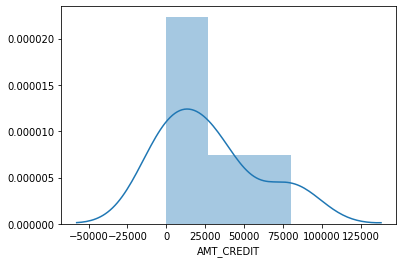

In [186]:
sns.distplot(prev_app0.AMT_CREDIT.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

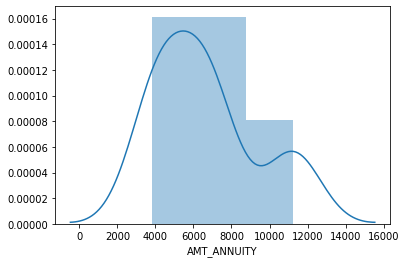

In [187]:
sns.distplot(prev_app0.AMT_ANNUITY.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

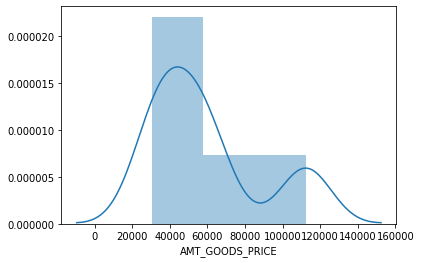

In [188]:
sns.distplot(prev_app0.AMT_GOODS_PRICE.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

#### Categorical variables

In [141]:
prev_app0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

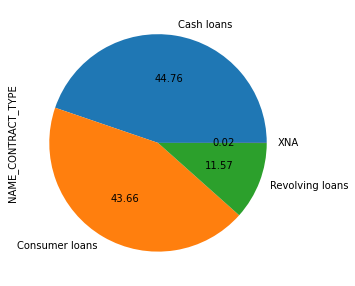

In [142]:
prev_app0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

In [143]:
prev_app0.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

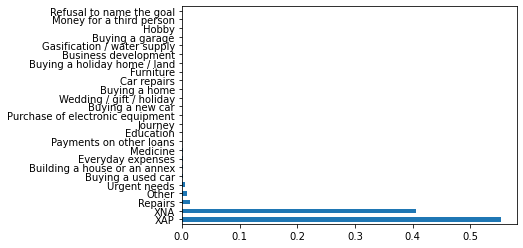

In [144]:
prev_app0['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True).plot.barh()
plt.show()

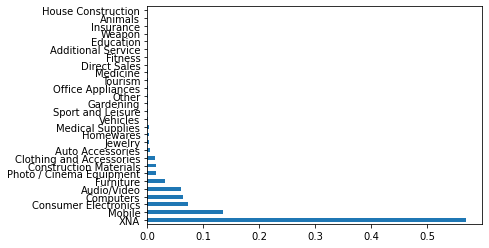

In [145]:
prev_app0['NAME_GOODS_CATEGORY'].value_counts(normalize=True).plot.barh()
plt.show()

### Categorical variables

In [146]:
prev_app0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

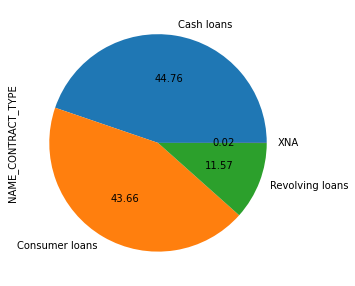

In [149]:
prev_app0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

In [150]:
prev_app0.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP             NaN   
1           -164                    XNA                XAP   Unaccompanied   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   

     CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0    Country-wide                35         Connectivity         12.0   
1  Contact center                -1                  XNA         36.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle  POS mobile with interest            365243.0   
1       low_action          Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0

### Bivariate analysis on prev_app0

#### Categorical - Numerical

<Figure size 1440x720 with 0 Axes>

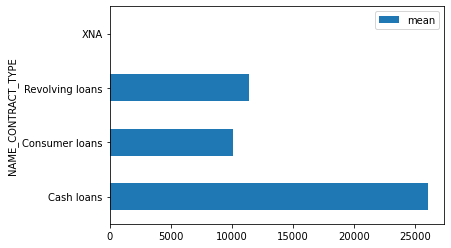

In [167]:
# Previously we identified the outliers in the income (>350000 are outliers)



plt.figure(figsize=(20,10))
prev_app0.groupby('NAME_CONTRACT_TYPE')['AMT_ANNUITY'].agg(['mean']).plot.barh()

plt.show()

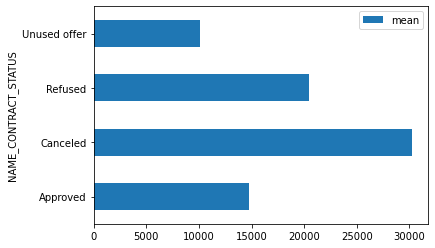

In [166]:
prev_app0.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY'].agg(['mean']).plot.barh()

plt.show()

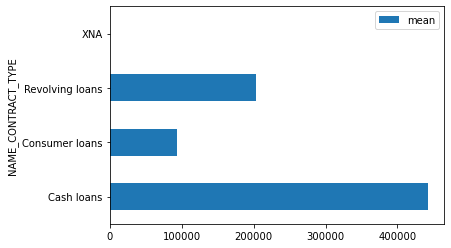

In [169]:
prev_app0.groupby('NAME_CONTRACT_TYPE')['AMT_GOODS_PRICE'].agg(['mean']).plot.barh()

plt.show()

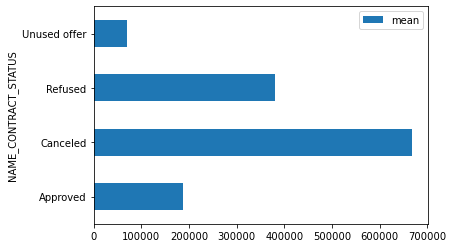

In [170]:
prev_app0.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE'].agg(['mean']).plot.barh()

plt.show()

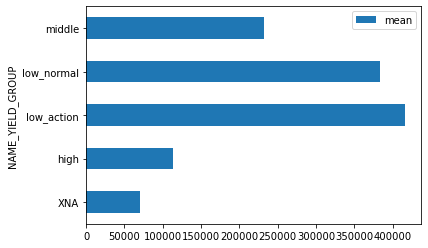

In [171]:
prev_app0.groupby('NAME_YIELD_GROUP')['AMT_CREDIT'].agg(['mean']).plot.barh()

plt.show()

### Categorical - Categorical

In [172]:
prev_app0.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [179]:
categories = ['NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP', 'NFLAG_INSURED_ON_APPROVAL', 'NAME_CASH_LOAN_PURPOSE']


In [177]:
prev_app1 = prev_app0[categories]
prev_app1

NAME_CONTRACT_STATUS   NAME_GOODS_CATEGORY NAME_YIELD_GROUP  \
0                   Approved                Mobile           middle   
1                   Approved                   XNA       low_action   
2                   Approved                   XNA             high   
3                   Approved                   XNA           middle   
4                    Refused                   XNA             high   
...                      ...                   ...              ...   
1670209             Approved             Furniture       low_normal   
1670210             Approved             Furniture           middle   
1670211             Approved  Consumer Electronics       low_normal   
1670212             Approved                   XNA       low_normal   
1670213             Approved                   XNA           middle   

         NFLAG_INSURED_ON_APPROVAL NAME_CASH_LOAN_PURPOSE  
0                              0.0                    XAP  
1                              1.0                    XNA  
2                              1.0                    XNA  
3                              1.0                    XNA  
4                              NaN                Repairs  
...                            ...                    ...  
1670209                        0.0                    XAP  
1670210                        0.0                    XAP  
1670211                        0.0                    XAP  
1670212                        1.0                    XNA  
1670213                        0.0                    XNA  

[1670214 rows x 5 columns]

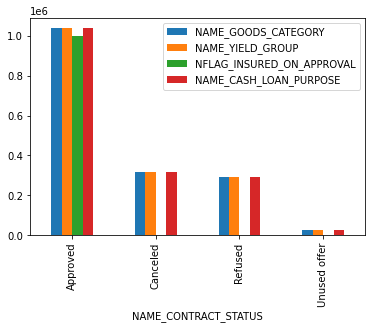

In [181]:
prev_app0.groupby('NAME_CONTRACT_STATUS')[categories].agg('count').plot.bar()
plt.show()

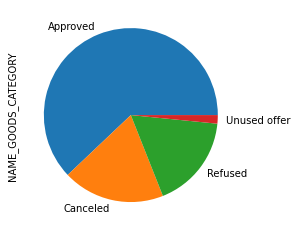

In [183]:
prev_app0.groupby('NAME_CONTRACT_STATUS')['NAME_GOODS_CATEGORY'].agg('count').plot.pie()
plt.show()

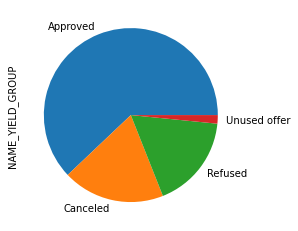

In [184]:
prev_app0.groupby('NAME_CONTRACT_STATUS')['NAME_YIELD_GROUP'].agg('count').plot.pie()
plt.show()

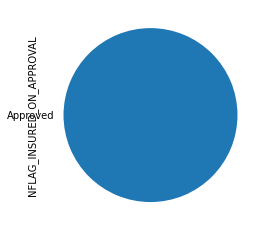

In [185]:
prev_app0.groupby('NAME_CONTRACT_STATUS')['NFLAG_INSURED_ON_APPROVAL'].agg('count').plot.pie()
plt.show()